In [1]:
import onnx
import torch
import numpy as np
from matplotlib import pyplot as plt
from StarV.util.plot import plot_star2D
from StarV.verifier.certifier import certifyRobustness
from StarV.util.load import load_neural_network_file

# Load Neural Network and Data

## Load PyTorch network

In [2]:
class ReLUFFNNModel(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, out_dim):
        super(ReLUFFNNModel, self).__init__()
        self.fc1 = torch.nn.Linear(input_dim, hidden_dim)
        self.relu1 = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(hidden_dim, hidden_dim)
        self.relu2 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(hidden_dim, out_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out
    
model = load_neural_network_file('simple_example1.pt', True)
print(model.info())

loading pytorch module
Network Information:
Network type: None
Input Dimension: 2
Output Dimension: 2
Number of Layers: 5
Layer types:
Layer 0: <class 'StarV.layer.FullyConnectedLayer.FullyConnectedLayer'> (2, 2)
Layer 1: <class 'StarV.layer.ReLULayer.ReLULayer'>
Layer 2: <class 'StarV.layer.FullyConnectedLayer.FullyConnectedLayer'> (2, 2)
Layer 3: <class 'StarV.layer.ReLULayer.ReLULayer'>
Layer 4: <class 'StarV.layer.FullyConnectedLayer.FullyConnectedLayer'> (2, 2)
None


## Load ONNX network

In [3]:
model = load_neural_network_file('simple_example1.onnx', True)
print(model.info())

loading onnx module
Network Information:
Network type: None
Input Dimension: 2
Output Dimension: 2
Number of Layers: 5
Layer types:
Layer 0: <class 'StarV.layer.FullyConnectedLayer.FullyConnectedLayer'> (2, 2)
Layer 1: <class 'StarV.layer.ReLULayer.ReLULayer'>
Layer 2: <class 'StarV.layer.FullyConnectedLayer.FullyConnectedLayer'> (2, 2)
Layer 3: <class 'StarV.layer.ReLULayer.ReLULayer'>
Layer 4: <class 'StarV.layer.FullyConnectedLayer.FullyConnectedLayer'> (2, 2)
None


/home/schoi/.local/lib/python3.10/site-packages/onnx2pytorch/convert/operations.py:154: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:199.)
  weight = torch.from_numpy(numpy_helper.to_array(params[0]))


## Load Input

In [4]:
"""
    Load Input dataset
"""
with open('simple_example1_input.npy', 'rb') as f:
    input = np.load(f)
print('input: {}'.format(input))

label = model.evaluate(input).argmax() + 1
print('label: {}'.format(label))

input: [-1.30707  1.77581]
label: 2


# Verify Robustness of Neural Network

robust:  [1.]
verification time:  [0.00016]
total verificatiom time:  0.0027456283569335938

Number of output star sets:  1


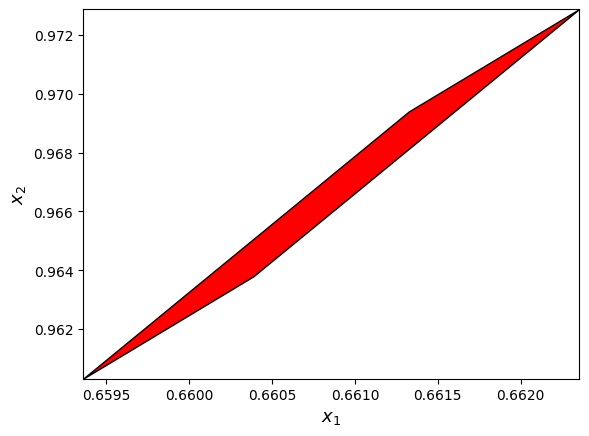

In [5]:
veriMethod='BFS'
reachMethod='exact'
lp_solver='gurobi'
show = True
epsilon = 0.01

'''
robustness results:

rb = 1: the network is robust
   = 0: the network is not robust
   = 2: robstness is uncertain / unknown
'''

rb, vt, total_vt, outputSet = certifyRobustness(model, input, epsilon, veriMethod, reachMethod, lp_solver, data_type='default', show=False)

'''
    Print verification results and plot output reachable set
'''
print('robust: ', rb)
print('verification time: ', vt)
print('total verificatiom time: ', total_vt)

print('\nNumber of output star sets: ', len(outputSet))
for i in range(len(outputSet)):
    ax = plot_star2D(outputSet[i], show=False)
    ax.set_ylabel('$x_2$', fontsize=13)
    ax.set_xlabel('$x_1$', fontsize=13)